## DATA EXPLORATION


In [2]:
import pandas as pd

# Load your dataset
data = pd.read_csv('corn_data.csv')

data.tail(5)

,Year,Type,Geolocation,Season,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
55,2020,Corn,PHILIPPINES,Dry,..,..,..,..,..,..,..,..,..,..,..,..,112190977,1.64
56,2020,Corn,PHILIPPINES,Wet,..,..,..,..,..,..,..,..,..,..,..,..,112190977,1.64
57,2021,Corn,PHILIPPINES,Average,18063,2545,7287,27894,45941,27878,25333,18047,0.65,8.62,3237,..,113880328,1.51
58,2021,Corn,PHILIPPINES,Dry,..,..,..,..,..,..,..,..,..,..,..,..,113880328,1.51
59,2021,Corn,PHILIPPINES,Wet,..,..,..,..,..,..,..,..,..,..,..,..,113880328,1.51


In [3]:
# Assuming 'data' is your dataframe
print(data['Year'].unique())


[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021]


In [4]:
# merged_data.to_csv('data/merged_data.csv', index=False)

## Data Pre-processing

In [5]:
# Check for missing values in the merged dataset
data.isnull().sum()

Year                                     0
Type                                     0
Geolocation                              0
Season                                   0
CASH COSTS                               0
NON-CASH COSTS                           0
IMPUTED COSTS                            0
TOTAL COSTS                              0
GROSS RETURNS                            0
RETURNS ABOVE CASH COSTS                 0
RETURNS ABOVE CASH AND NON-CASH COSTS    0
NET RETURNS                              0
NET PROFIT-COST RATIO                    0
Cost per kilogram (pesos)                0
Yield per hectare (kg)                   0
Farmgate price (pesos/kg)                0
Population                               0
Annual % Change                          0
dtype: int64

In [6]:
data.dtypes

Year                                       int64
Type                                      object
Geolocation                               object
Season                                    object
CASH COSTS                                object
NON-CASH COSTS                            object
IMPUTED COSTS                             object
TOTAL COSTS                               object
GROSS RETURNS                             object
RETURNS ABOVE CASH COSTS                  object
RETURNS ABOVE CASH AND NON-CASH COSTS     object
NET RETURNS                               object
NET PROFIT-COST RATIO                     object
Cost per kilogram (pesos)                 object
Yield per hectare (kg)                    object
Farmgate price (pesos/kg)                 object
Population                                 int64
Annual % Change                          float64
dtype: object

In [7]:
# Convert object columns to numeric, forcing errors to NaN (in case of any non-numeric values)
columns_to_convert = ['CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 'GROSS RETURNS',
                      'RETURNS ABOVE CASH COSTS', 'RETURNS ABOVE CASH AND NON-CASH COSTS', 'NET RETURNS',
                      'NET PROFIT-COST RATIO', 'Cost per kilogram (pesos)', 'Yield per hectare (kg)', 
                      'Farmgate price (pesos/kg)']

# Convert the columns to numeric, forcing errors='coerce' to handle any invalid parsing
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [8]:
data.isnull().sum()

Year                                      0
Type                                      0
Geolocation                               0
Season                                    0
CASH COSTS                               26
NON-CASH COSTS                           26
IMPUTED COSTS                            26
TOTAL COSTS                              26
GROSS RETURNS                            26
RETURNS ABOVE CASH COSTS                 26
RETURNS ABOVE CASH AND NON-CASH COSTS    26
NET RETURNS                              26
NET PROFIT-COST RATIO                    26
Cost per kilogram (pesos)                26
Yield per hectare (kg)                   26
Farmgate price (pesos/kg)                27
Population                                0
Annual % Change                           0
dtype: int64

In [9]:
data.head()

,Year,Type,Geolocation,Season,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
0,2002,Corn,PHILIPPINES,Average,5430.0,1377.0,4008.0,10815.0,13554.0,8124.0,6747.0,2739.0,0.25,5.65,1915.0,7.08,81285572,2.08
1,2002,Corn,PHILIPPINES,Dry,5255.0,1355.0,4535.0,11145.0,14096.0,8841.0,7486.0,2951.0,0.26,5.59,1994.0,7.07,81285572,2.08
2,2002,Corn,PHILIPPINES,Wet,5594.0,1398.0,3516.0,10508.0,13046.0,7452.0,6054.0,2538.0,0.24,5.70,1842.0,7.08,81285572,2.08
3,2003,Corn,PHILIPPINES,Average,5827.0,1317.0,4602.0,11746.0,12907.0,7080.0,5763.0,1161.0,0.10,6.13,1915.0,6.74,82942837,2.04
4,2003,Corn,PHILIPPINES,Dry,5487.0,1306.0,4961.0,11754.0,14254.0,8767.0,7461.0,2500.0,0.21,5.43,2163.0,6.59,82942837,2.04


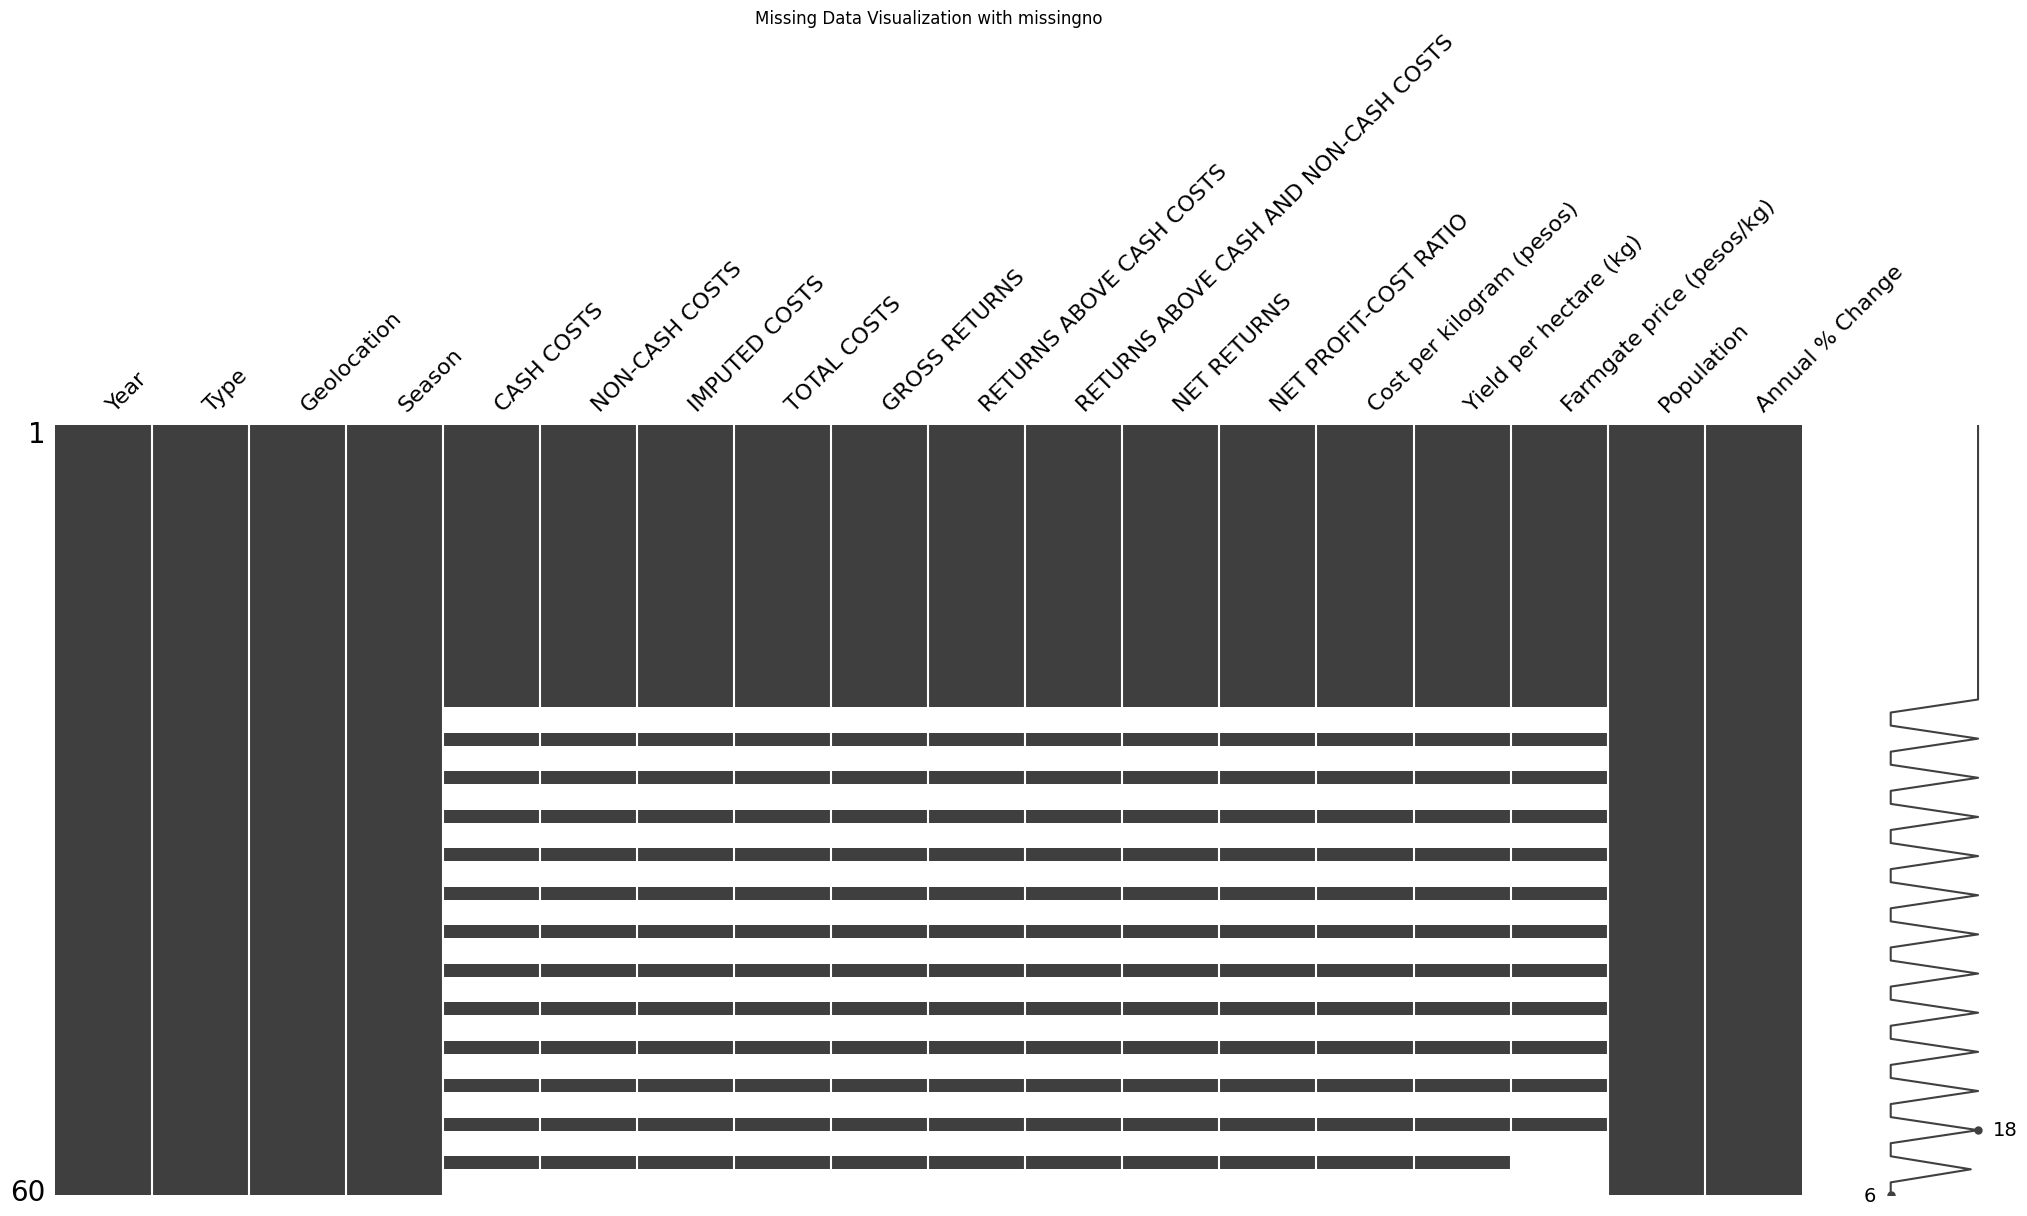

In [10]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data using missingno
msno.matrix(data)
plt.title('Missing Data Visualization with missingno')
plt.show()

In [11]:
# Impute the specified columns using median imputation first
columns_to_impute_median = ['CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 'GROSS RETURNS',
                            'RETURNS ABOVE CASH COSTS', 'RETURNS ABOVE CASH AND NON-CASH COSTS', 'NET RETURNS',
                            'NET PROFIT-COST RATIO', 'Cost per kilogram (pesos)', 'Yield per hectare (kg)', 
                            'Farmgate price (pesos/kg)']

# Apply median imputation
data[columns_to_impute_median] = data[columns_to_impute_median].fillna(data[columns_to_impute_median].median())

# Now check how many missing values remain
data.isnull().sum()


Year                                     0
Type                                     0
Geolocation                              0
Season                                   0
CASH COSTS                               0
NON-CASH COSTS                           0
IMPUTED COSTS                            0
TOTAL COSTS                              0
GROSS RETURNS                            0
RETURNS ABOVE CASH COSTS                 0
RETURNS ABOVE CASH AND NON-CASH COSTS    0
NET RETURNS                              0
NET PROFIT-COST RATIO                    0
Cost per kilogram (pesos)                0
Yield per hectare (kg)                   0
Farmgate price (pesos/kg)                0
Population                               0
Annual % Change                          0
dtype: int64

In [12]:
import seaborn as sns

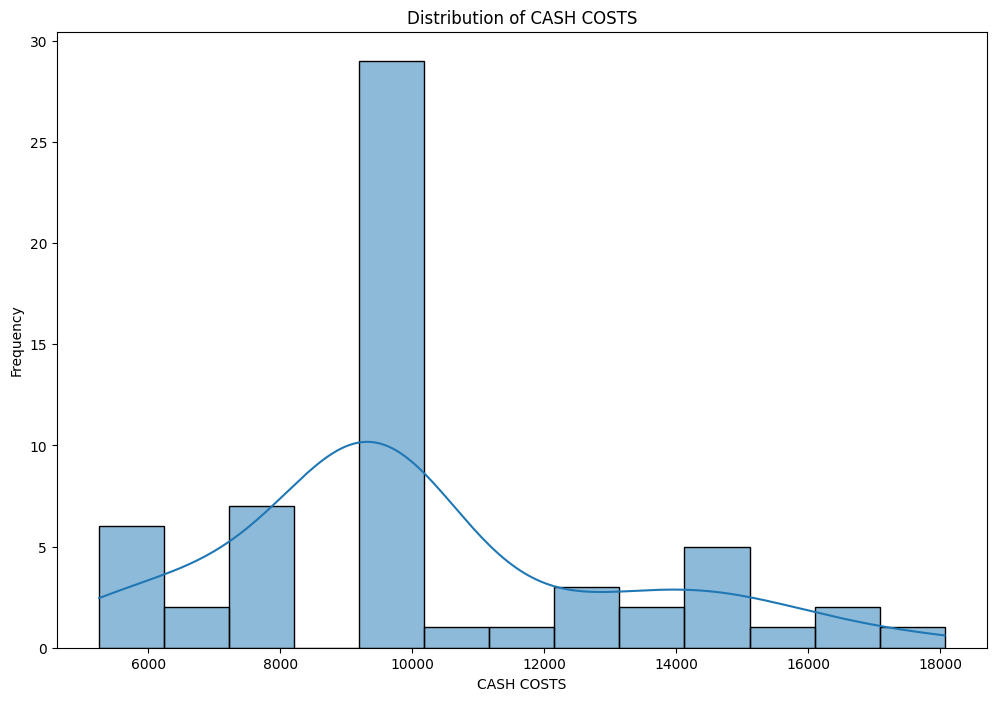

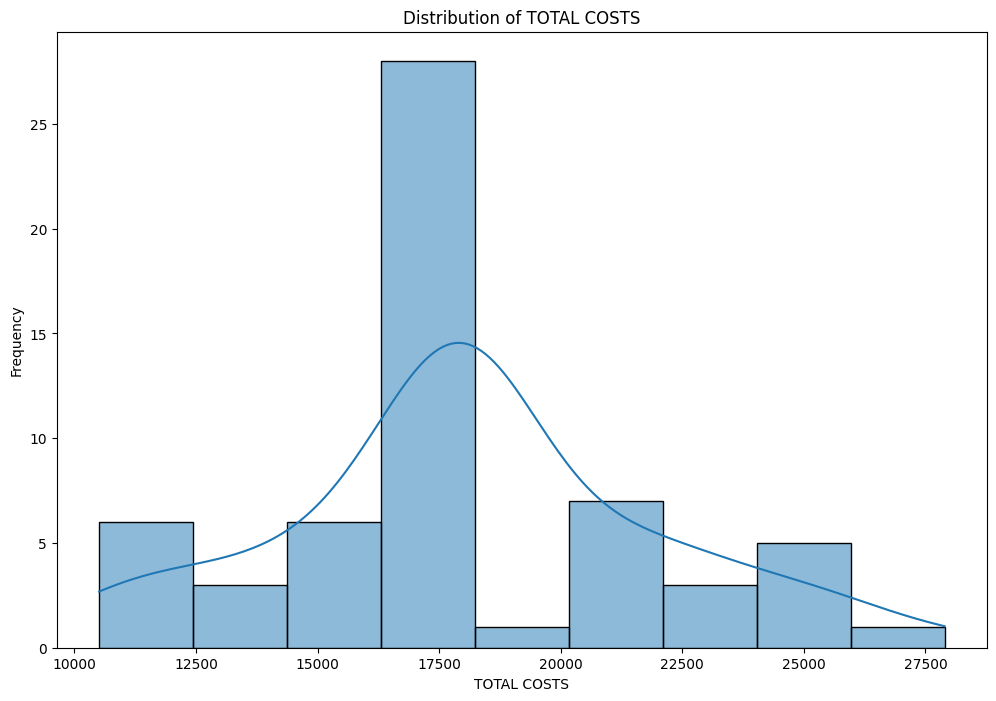

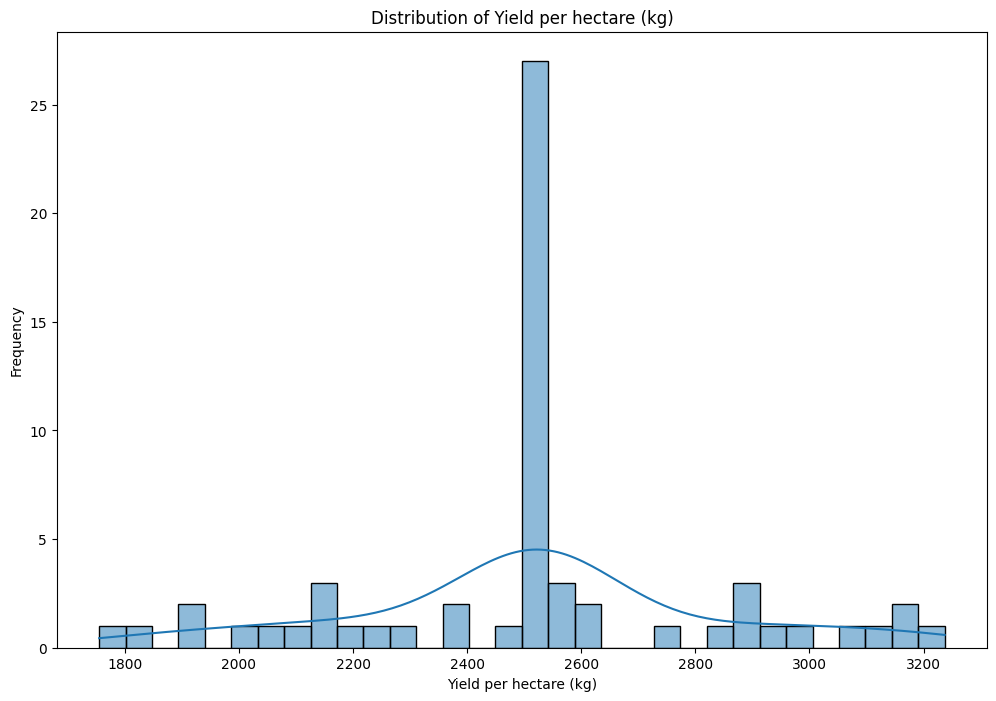

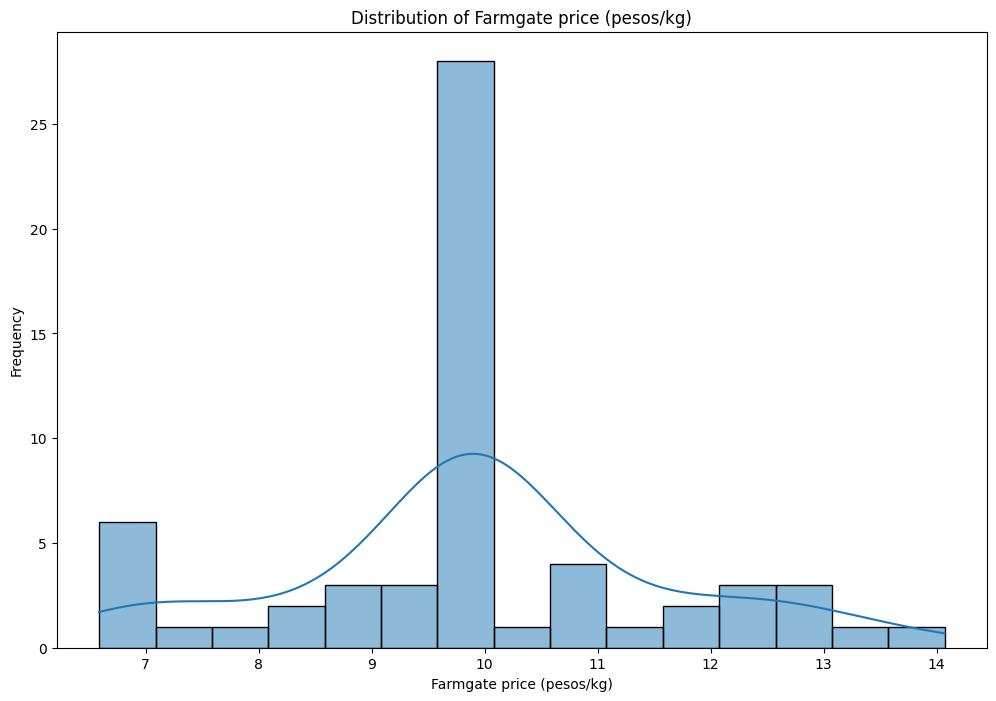

In [13]:
# Plot distribution of key numerical variables

plt.figure(figsize=(12, 8))
sns.histplot(data['CASH COSTS'], kde=True)
plt.title('Distribution of CASH COSTS')
plt.xlabel('CASH COSTS')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['TOTAL COSTS'], kde=True)
plt.title('Distribution of TOTAL COSTS')
plt.xlabel('TOTAL COSTS')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['Yield per hectare (kg)'], kde=True)
plt.title('Distribution of Yield per hectare (kg)')
plt.xlabel('Yield per hectare (kg)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['Farmgate price (pesos/kg)'], kde=True)
plt.title('Distribution of Farmgate price (pesos/kg)')
plt.xlabel('Farmgate price (pesos/kg)')
plt.ylabel('Frequency')
plt.show()

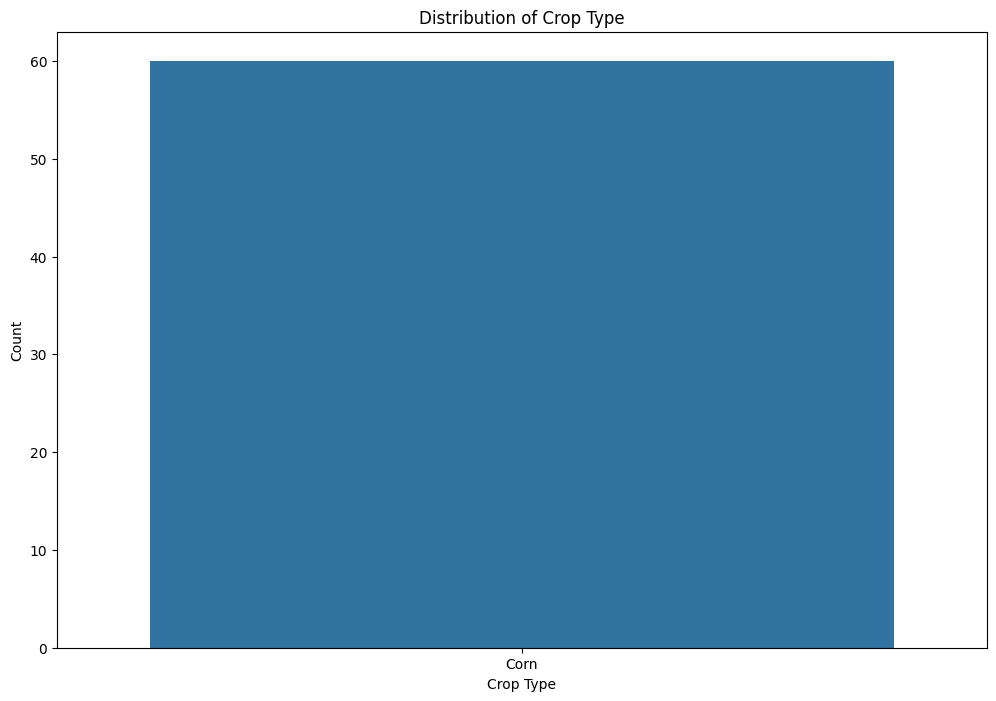

In [14]:
# Plot categorical variable 'Type'
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Type')
plt.title('Distribution of Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()

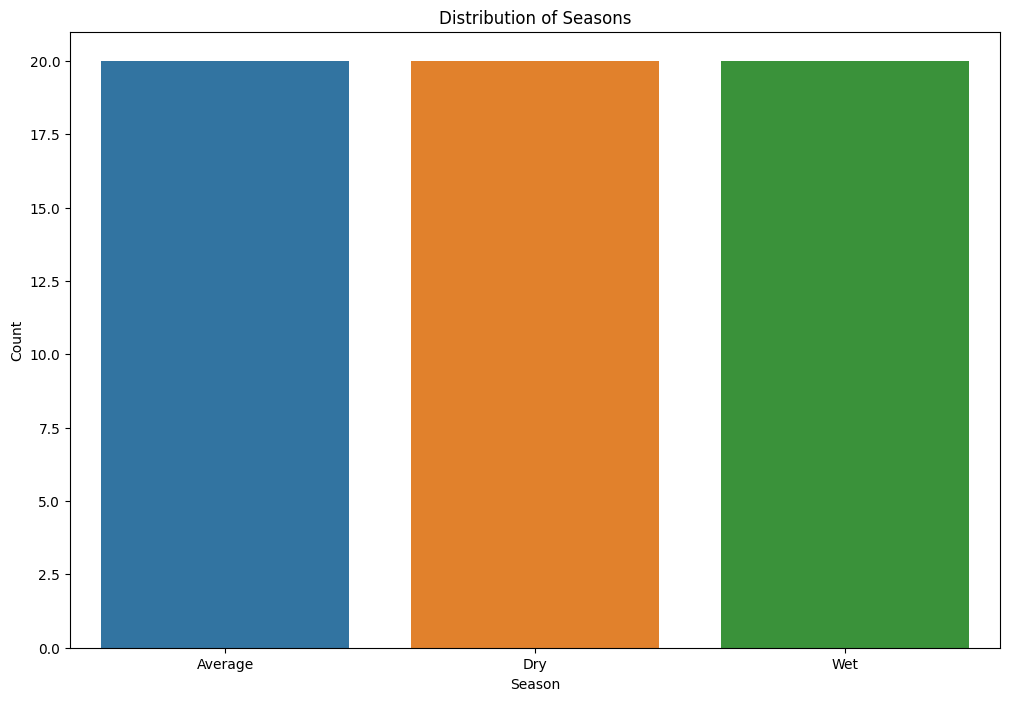

In [15]:


# Plot categorical variable 'Season'
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Season')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

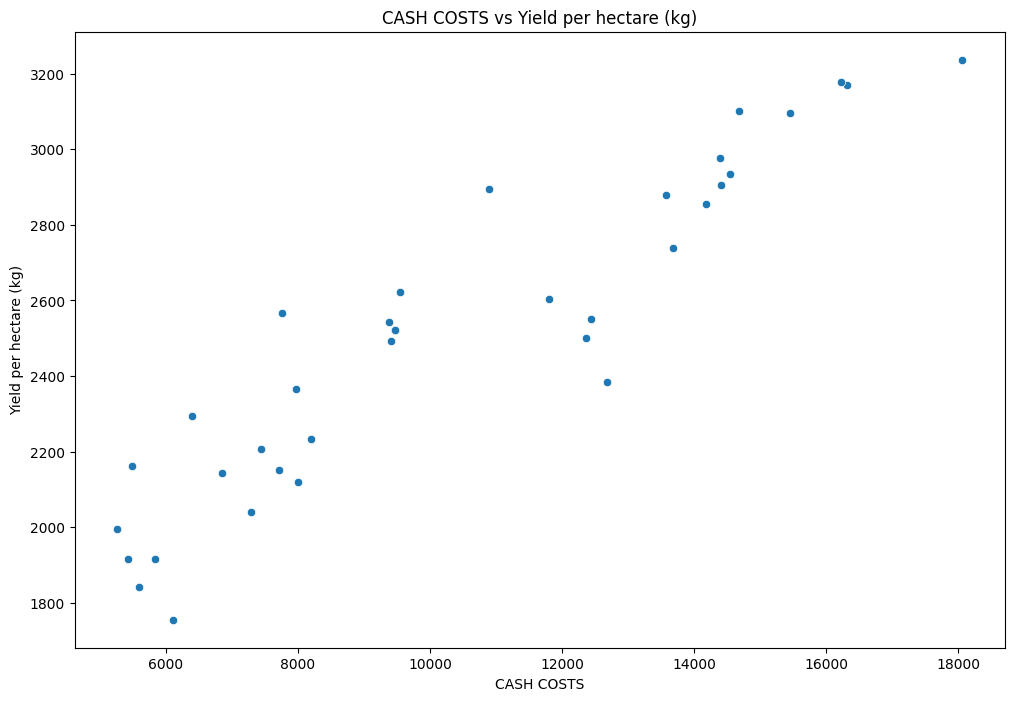

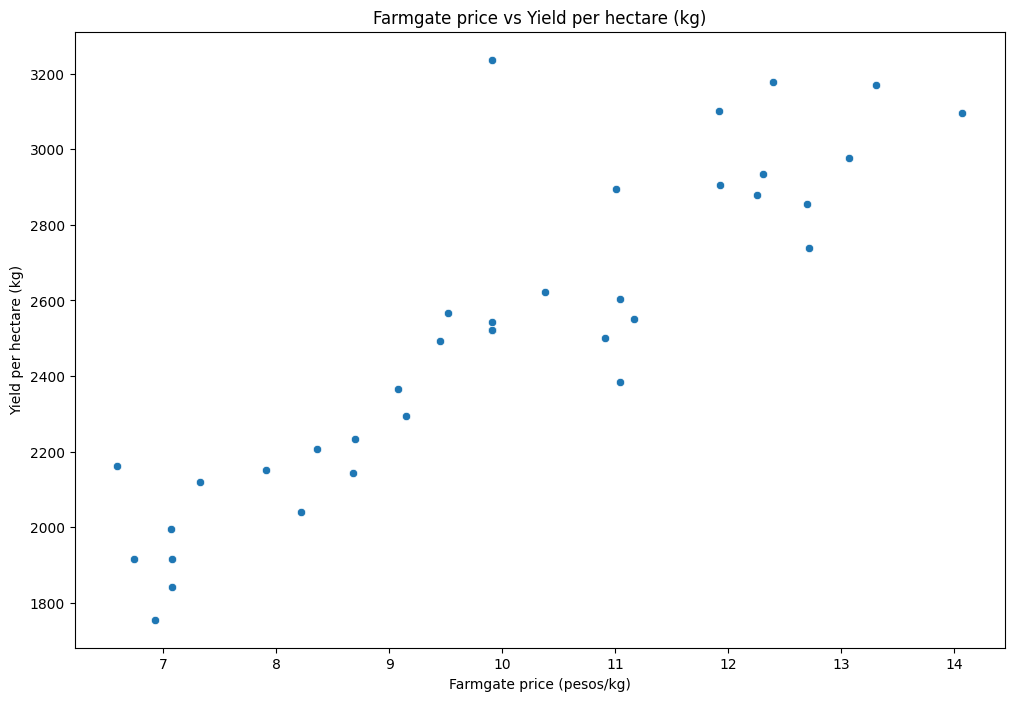

In [16]:
# Scatterplot: CASH COSTS vs Gross Returns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='CASH COSTS', y='Yield per hectare (kg)')
plt.title('CASH COSTS vs Yield per hectare (kg)')
plt.xlabel('CASH COSTS')
plt.ylabel('Yield per hectare (kg)')
plt.show()

# Scatterplot: Farmgate price vs Gross Returns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Farmgate price (pesos/kg)', y='Yield per hectare (kg)')
plt.title('Farmgate price vs Yield per hectare (kg)')
plt.xlabel('Farmgate price (pesos/kg)')
plt.ylabel('Yield per hectare (kg)')
plt.show()


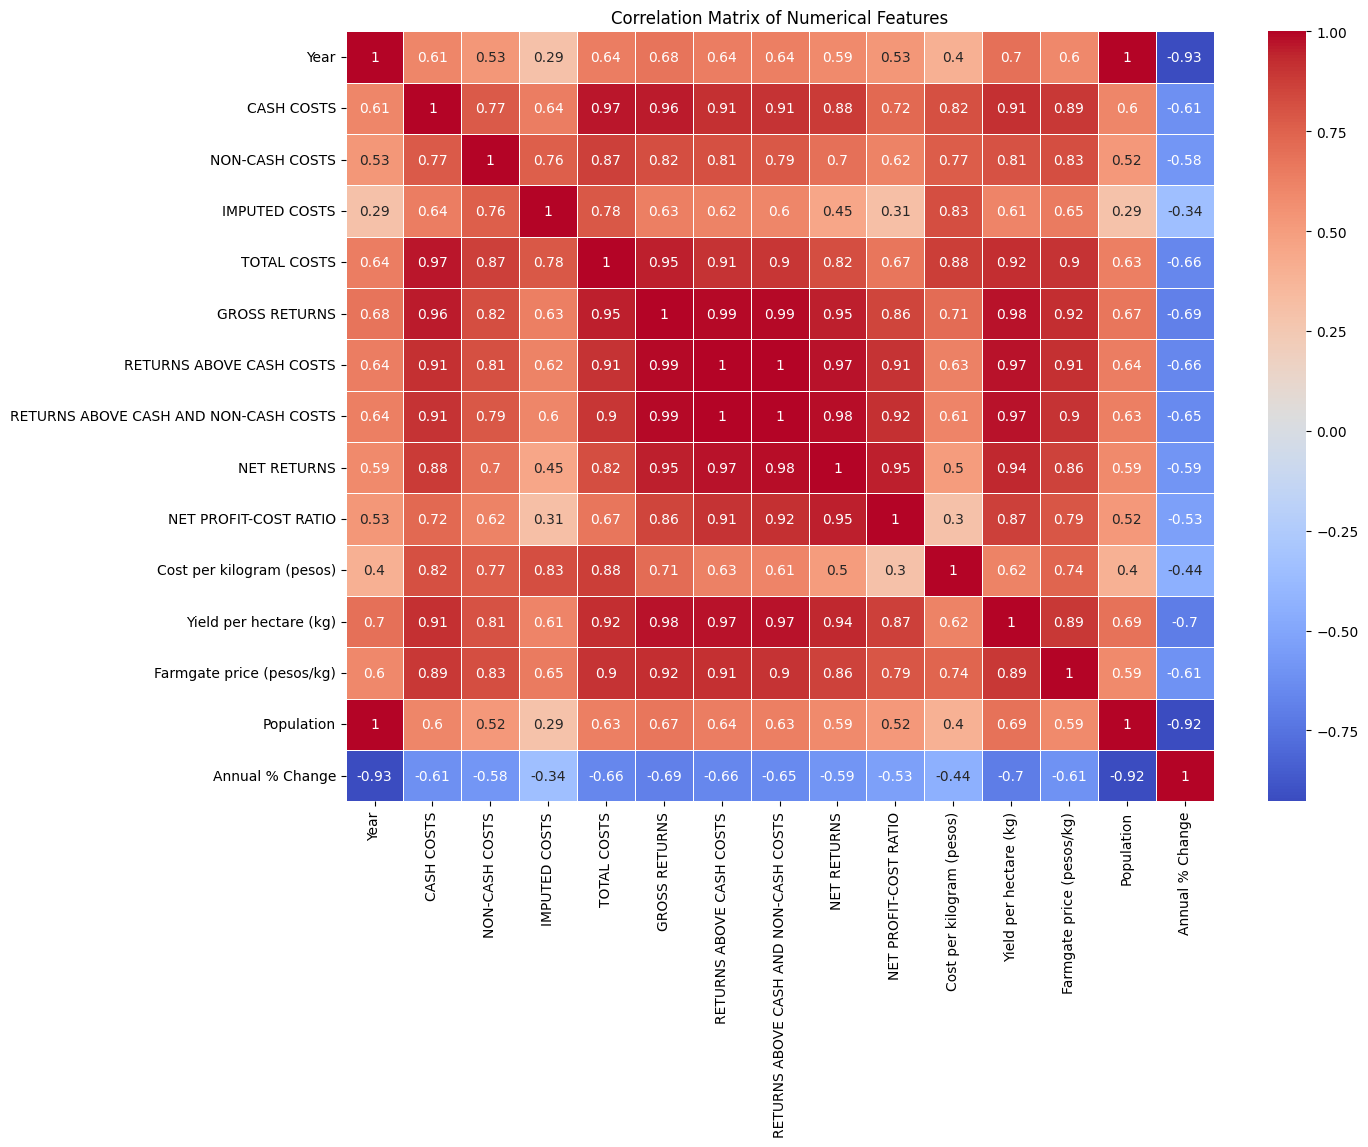

In [17]:
# Select only the numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Generate a correlation matrix for the numerical features
correlation_matrix = numeric_columns.corr()

# Set up the plot for a heatmap
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

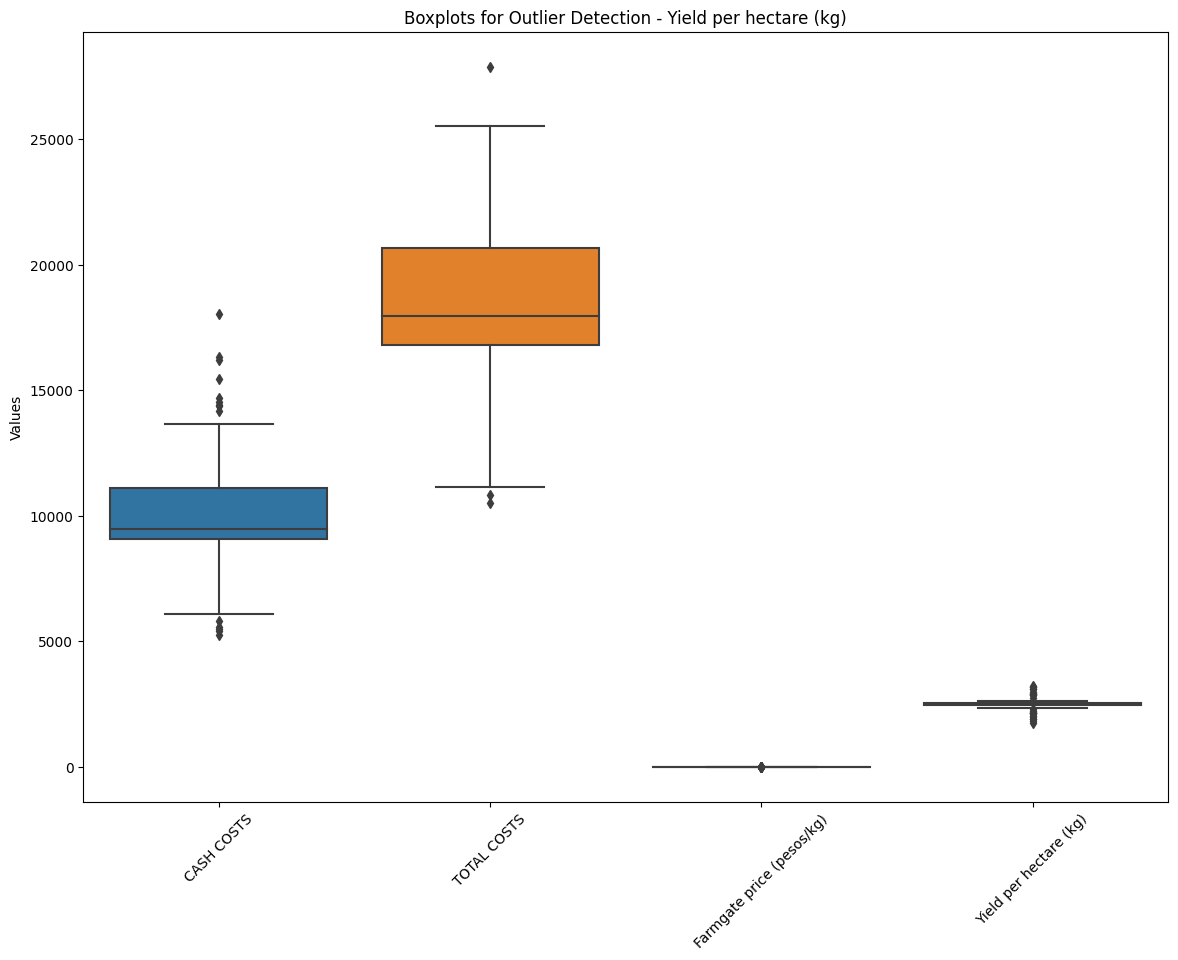

In [18]:
# Set up the figure for outlier detection using boxplots
plt.figure(figsize=(14, 10))

# Create boxplots for key numerical features to visualize outliers
sns.boxplot(data=data[['CASH COSTS', 'TOTAL COSTS', 'Farmgate price (pesos/kg)', 'Yield per hectare (kg)']])
plt.title('Boxplots for Outlier Detection - Yield per hectare (kg)')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


In [19]:
# Generate summary statistics for the numerical features
summary_statistics = data.describe()

# Display the summary statistics
summary_statistics

,Year,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,2011.500000,10027.733333,1995.716667,5780.100000,18175.333333,26093.150000,15666.750000,13627.716667,7513.733333,0.389500,7.088333,2516.000000,9.959833,9.732290e+07,1.805500
std,5.814943,2922.223165,297.105933,957.673584,3817.020187,7572.815775,4846.273706,4611.563579,4143.255683,0.155446,0.785090,322.737588,1.651974,9.967355e+06,0.146535
min,2002.000000,5255.000000,1306.000000,3516.000000,10508.000000,12162.000000,6056.000000,4708.000000,457.000000,0.040000,5.430000,1755.000000,6.590000,8.128557e+07,1.510000
25%,2006.750000,9079.250000,2001.500000,5543.500000,16791.750000,24222.500000,14488.250000,12555.500000,5829.750000,0.367500,6.880000,2465.250000,9.502500,8.914649e+07,1.695000
50%,2011.500000,9473.500000,2016.000000,5635.500000,17983.000000,25770.500000,15377.000000,13261.000000,6855.000000,0.375000,6.960000,2522.500000,9.910000,9.718512e+07,1.795000
75%,2016.250000,11115.750000,2066.500000,5782.500000,20672.000000,27239.750000,16218.000000,14076.000000,7637.500000,0.405000,7.170000,2556.000000,10.512500,1.053411e+08,1.892500
max,2021.000000,18063.000000,2545.000000,8849.000000,27894.000000,45941.000000,28065.000000,25656.000000,19431.000000,0.810000,9.110000,3237.000000,14.070000,1.138803e+08,2.080000


In [20]:
# Function to cap outliers based on IQR
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    column_capped = column.clip(lower=lower_bound, upper=upper_bound)
    return column_capped

# Capping outliers for the selected numerical features
data['CASH COSTS'] = cap_outliers(data['CASH COSTS'])
data['TOTAL COSTS'] = cap_outliers(data['TOTAL COSTS'])
data['Farmgate price (pesos/kg)'] = cap_outliers(data['Farmgate price (pesos/kg)'])
data['Yield per hectare (kg)'] = cap_outliers(data['Yield per hectare (kg)'])  # Added to cap outliers in GROSS RETURNS

# Check the summary statistics after capping outliers to see the effect
summary_statistics_after_capping = data.describe()

# Display the summary statistics after capping
summary_statistics_after_capping


,Year,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,2011.500000,9890.716667,1995.716667,5780.100000,18162.302083,26093.150000,15666.750000,13627.716667,7513.733333,0.389500,7.088333,2513.402083,9.969333,9.732290e+07,1.805500
std,5.814943,2489.861490,297.105933,957.673584,3739.733923,7572.815775,4846.273706,4611.563579,4143.255683,0.155446,0.785090,122.913928,1.233610,9.967355e+06,0.146535
min,2002.000000,6024.500000,1306.000000,3516.000000,10971.375000,12162.000000,6056.000000,4708.000000,457.000000,0.040000,5.430000,2329.125000,7.987500,8.128557e+07,1.510000
25%,2006.750000,9079.250000,2001.500000,5543.500000,16791.750000,24222.500000,14488.250000,12555.500000,5829.750000,0.367500,6.880000,2465.250000,9.502500,8.914649e+07,1.695000
50%,2011.500000,9473.500000,2016.000000,5635.500000,17983.000000,25770.500000,15377.000000,13261.000000,6855.000000,0.375000,6.960000,2522.500000,9.910000,9.718512e+07,1.795000
75%,2016.250000,11115.750000,2066.500000,5782.500000,20672.000000,27239.750000,16218.000000,14076.000000,7637.500000,0.405000,7.170000,2556.000000,10.512500,1.053411e+08,1.892500
max,2021.000000,14170.500000,2545.000000,8849.000000,26492.375000,45941.000000,28065.000000,25656.000000,19431.000000,0.810000,9.110000,2692.125000,12.027500,1.138803e+08,2.080000


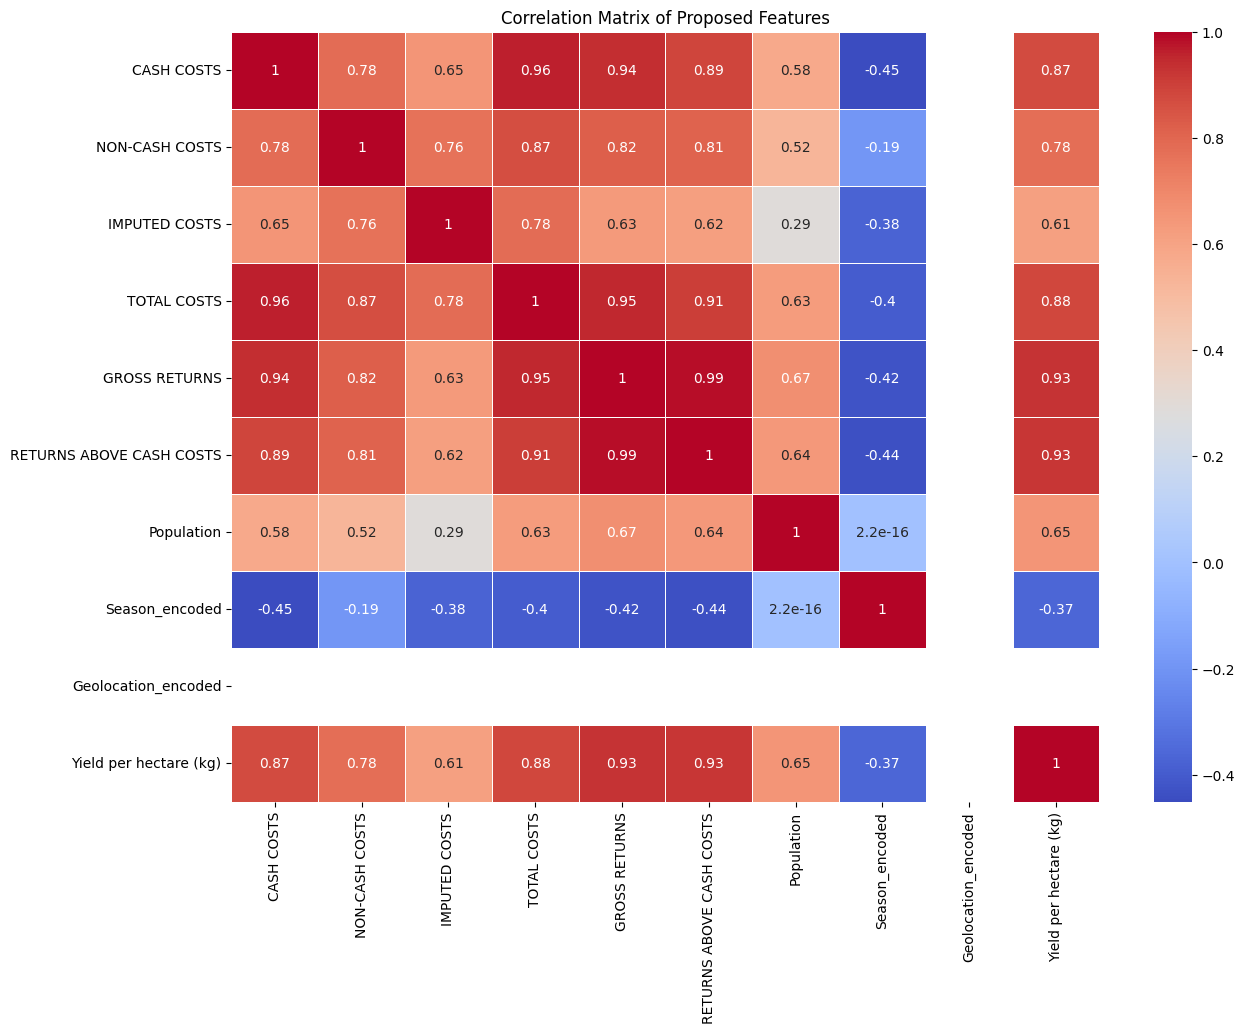

In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode 'Season' and 'Geolocation'
data['Season_encoded'] = label_encoder.fit_transform(data['Season'])
data['Geolocation_encoded'] = label_encoder.fit_transform(data['Geolocation'])

# Now retry the correlation analysis on the proposed features
proposed_features = [
    'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 
    'GROSS RETURNS', 'RETURNS ABOVE CASH COSTS', 'Population', 
    'Season_encoded', 'Geolocation_encoded', 'Yield per hectare (kg)'
]

# Generate a correlation matrix for the proposed features
correlation_matrix_proposed = data[proposed_features].corr()

# Set up the plot for a heatmap of the proposed features' correlation matrix
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix for proposed features
sns.heatmap(correlation_matrix_proposed, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Proposed Features')
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder

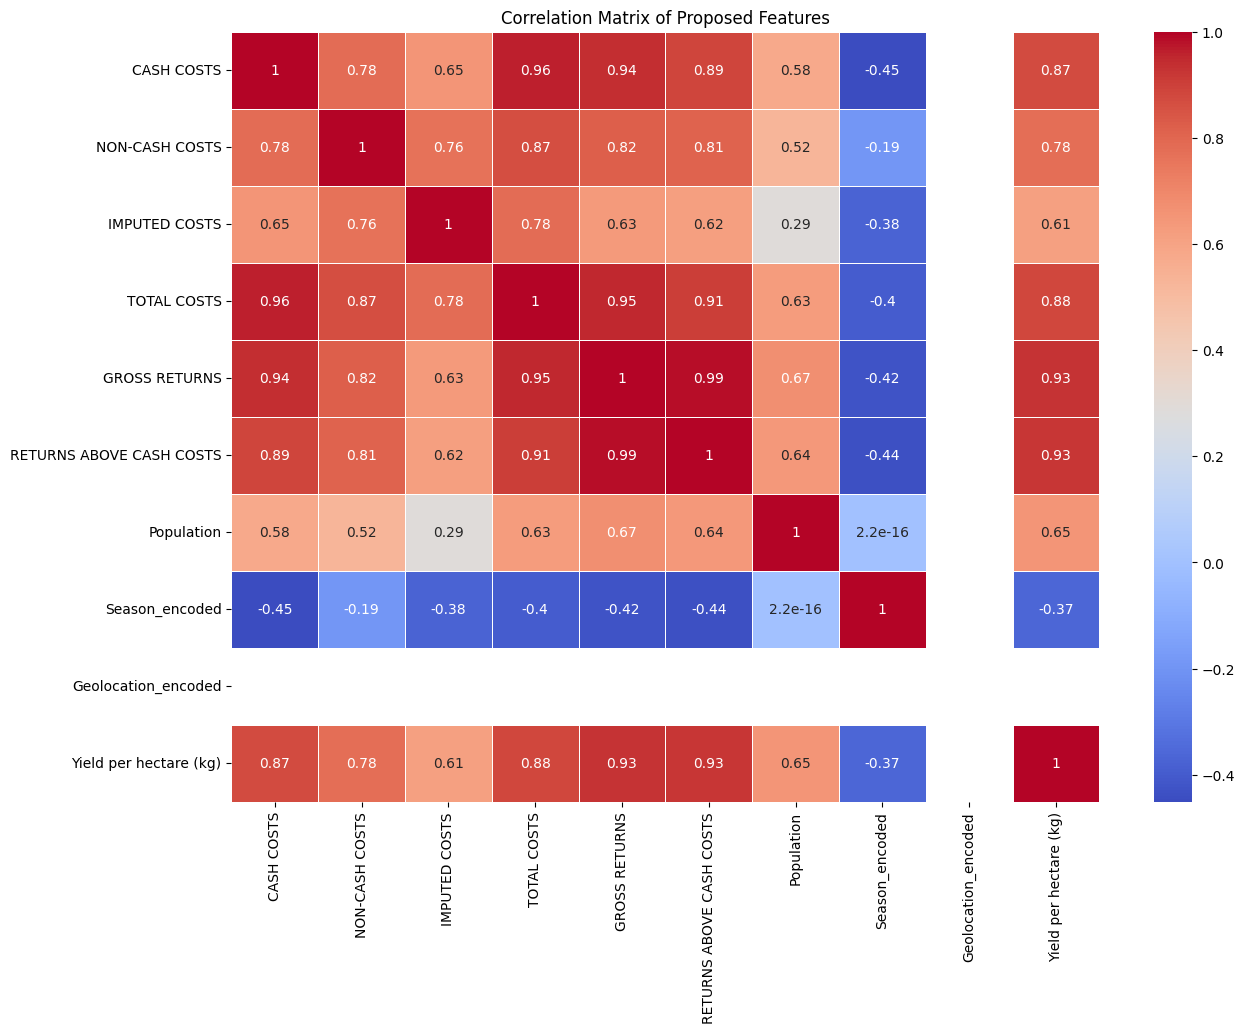

In [23]:
# Re-encode the categorical columns 'Season' and 'Geolocation' to ensure they are present
label_encoder = LabelEncoder()

# Create encoded versions of 'Season' and 'Geolocation'
data['Season_encoded'] = label_encoder.fit_transform(data['Season'])
data['Geolocation_encoded'] = label_encoder.fit_transform(data['Geolocation'])

# Now retry the correlation analysis on the proposed features
proposed_features = [
    'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 
    'GROSS RETURNS', 'RETURNS ABOVE CASH COSTS', 'Population', 
    'Season_encoded', 'Geolocation_encoded', 'Yield per hectare (kg)'
]

# Generate a correlation matrix for the numerical features
correlation_matrix_proposed = data[proposed_features].corr()

# Set up the plot for a heatmap of the proposed features' correlation matrix
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix for proposed features
sns.heatmap(correlation_matrix_proposed, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Proposed Features')
plt.show()

In [ ]:
import numpy as np

# Convert 'Year' to integer if it's not already
data['Year'] = data['Year'].astype(int)


# Select the features and target variable
features = [
    'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 
    'TOTAL COSTS', 'RETURNS ABOVE CASH COSTS', 
    'Population', 'Season_encoded', 'GROSS RETURNS'
]
target_variable = 'Yield per hectare (kg)'

forecast_horizon = 10

## FINAL MODEL

In [ ]:
from sklearn.model_selection import GridSearchCV
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from skforecast.model_selection import backtesting_forecaster

In [26]:
# Initialize and configure the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for the RandomForestRegressor
param_grid = {
    'n_estimators': [100, 150, 200, 300],  # Number of trees
    'max_depth': [None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'max_features' : ['sqrt', 'log2'],
    'criterion' : ['squared_error'],
    'min_samples_leaf' : [1, 2, 4] 
    }

In [27]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=30, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(data[features], data[target_variable])

#Get cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Sort by mean test score in descending order (since higher scores are better for negative MSE)
cv_results_sorted = cv_results.sort_values(by='mean_test_score', ascending=False)



Fitting 30 folds for each of 72 candidates, totalling 2160 fits
[CV] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_

In [28]:
# Display the 5 best hyperparameter combinations with improved visualization
print("Top 5 Best Hyperparameter Combinations with Scores:")
display(cv_results_sorted[['params', 'mean_test_score']].head(5).style.background_gradient(cmap='Greens'))

# Display the 5 worst hyperparameter combinations with improved visualization
print("\nTop 5 Worst Hyperparameter Combinations with Scores:")
display(cv_results_sorted[['params', 'mean_test_score']].tail(5).style.background_gradient(cmap='Reds'))

Top 5 Best Hyperparameter Combinations with Scores:


,params,mean_test_score
56,"{'criterion': 'squared_error', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}",-996.619489
57,"{'criterion': 'squared_error', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}",-1001.325545
44,"{'criterion': 'squared_error', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}",-1017.630116
49,"{'criterion': 'squared_error', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}",-1023.217184
53,"{'criterion': 'squared_error', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}",-1024.432747



Top 5 Worst Hyperparameter Combinations with Scores:


,params,mean_test_score
30,"{'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}",-1324.846972
24,"{'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}",-1334.008785
28,"{'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}",-1334.008785
27,"{'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}",-1340.794835
31,"{'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}",-1340.794835


In [29]:
# Initialize the forecaster with the best RandomForestRegressor and configure the lags
forecaster = ForecasterAutoreg(
    regressor=rf,
    lags=12  # Adjust this based on your specific needs
)

# Fit the forecaster to the entire dataset
forecaster.fit(y=data[target_variable], exog=data[features])


c:\Users\harol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [30]:
# backtesting to evaluate the model on the most recent part of the data
initial_train_size = len(data) - forecast_horizon

# Backtesting the model: predictions for the most recent part of the data
backtest_predictions = backtesting_forecaster(
    forecaster=forecaster,
    y=data[target_variable],
    exog=data[features],
    initial_train_size=initial_train_size,
    steps=forecast_horizon,
    metric='mean_squared_error',  
    verbose=True
)


Information of backtesting process
----------------------------------
Number of observations used for initial training: 50
Number of observations used for backtesting: 10
    Number of folds: 1
    Number skipped folds: 0 
    Number of steps per fold: 10
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 49  (n=50)
    Validation: 50 -- 59  (n=10)



  0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
# Make predictions for the next 10 years
# Exogenous variables for future periods must be provided if they are used in the model
future_exog = pd.DataFrame({
    
    'CASH COSTS': np.random.rand(forecast_horizon),
    'NON-CASH COSTS': np.random.rand(forecast_horizon),
    'IMPUTED COSTS': np.random.rand(forecast_horizon),
    'TOTAL COSTS': np.random.rand(forecast_horizon),
    'RETURNS ABOVE CASH COSTS': np.random.rand(forecast_horizon),
    'Population': np.linspace(start=data['Population'].iloc[-1], stop=data['Population'].iloc[-1] * 1.1, num=forecast_horizon),
    'Season_encoded': np.random.randint(low=0, high=4, size=forecast_horizon),  # Adjust as per actual categories
    'GROSS RETURNS': np.random.rand(forecast_horizon)
    
})

# Define the years corresponding to the predictions
years = np.arange(2022, 2032)

In [32]:
# Assuming 'data' is your dataframe
print(data['Year'].unique())


[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021]


In [33]:
last_index = 59  # The last index of your training data
steps = 10  # Number of steps you want to predict

# Create a new index for the exog data starting from last_index + 1
new_index = np.arange(last_index + 1, last_index + 1 + steps)
exog_future = future_exog.copy()  
exog_future.index = new_index

# Now use this exog to make predictions
predictions = forecaster.predict(steps=steps, exog=exog_future)

# Print or plot your predictions
print(predictions)


60    2389.10750
61    2375.73750
62    2375.63750
63    2374.98875
64    2376.58000
65    2374.24125
66    2374.50500
67    2374.13625
68    2374.04625
69    2371.74625
Name: pred, dtype: float64


c:\Users\harol\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\utils\utils.py:1260: UserWarning: `exog` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


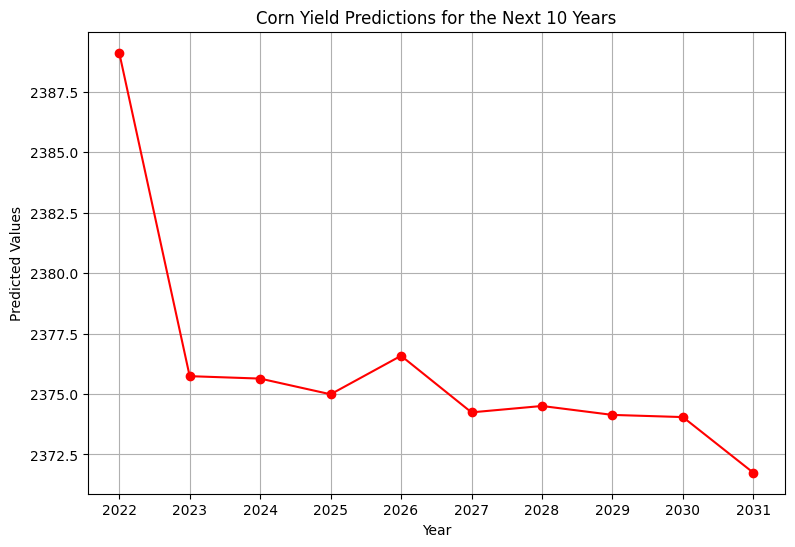

In [34]:
plt.figure(figsize=(9, 6))
plt.plot(years, predictions, marker='o', color='r')
plt.title('Corn Yield Predictions for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.xticks(years)  # Set x-axis ticks to the defined years
plt.show()